In [15]:
##Citation
#Jumper, J., Evans, R., Pritzel, A. et al. Highly accurate protein structure prediction with AlphaFold. Nature 596, 583–589 (2021). https://doi.org/10.1038/s41586-021-03819-2
#Mihaly Varadi, Stephen Anyango, Mandar Deshpande, Sreenath Nair, Cindy Natassia, Galabina Yordanova, David Yuan, Oana Stroe, Gemma Wood, Agata Laydon, Augustin Žídek, Tim Green, Kathryn Tunyasuvunakool, Stig Petersen, John Jumper, Ellen Clancy, Richard Green, Ankur Vora, Mira Lutfi, Michael Figurnov, Andrew Cowie, Nicole Hobbs, Pushmeet Kohli, Gerard Kleywegt, Ewan Birney, Demis Hassabis, Sameer Velankar, AlphaFold Protein Structure Database: massively expanding the structural coverage of protein-sequence space with high-accuracy models, Nucleic Acids Research, Volume 50, Issue D1, 7 January 2022, Pages D439–D444, https://doi.org/10.1093/nar/gkab1061
#https://alphafold.ebi.ac.uk/entry/A0A6J3EQU8
#https://biopython.org/docs/1.75/api/Bio.PDB.Residue.html
#https://biopython.org/docs/1.75/api/Bio.PDB.Atom.html

In [16]:
import os #Bring the os to check working directory
os.getcwd()

'C:\\Users\\panky\\Desktop\\pLDDT'

In [17]:
from Bio.PDB import * #Bring the Bio.PDB for ananlysis, Bio.PDB is included in Biopython

In [18]:
##Set up the PDB file
par = PDBParser() #Set PDBParser() to par for convenient
protein = par.get_structure("MRGPRX2", "AF-A0A6J3EQU8-F1-model_v3.pdb") #Load the PDB file

In [19]:
protein #Check the file

<Structure id=MRGPRX2>

In [20]:
print(dir(protein)) #Check the module

['__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_generate_full_id', '_id', '_reset_full_id', 'add', 'atom_to_internal_coordinates', 'center_of_mass', 'child_dict', 'child_list', 'copy', 'detach_child', 'detach_parent', 'full_id', 'get_atoms', 'get_chains', 'get_full_id', 'get_id', 'get_iterator', 'get_level', 'get_list', 'get_models', 'get_parent', 'get_residues', 'has_id', 'header', 'id', 'insert', 'internal_to_atom_coordinates', 'level', 'parent', 'set_parent', 'transform', 'xtra']


In [21]:
print(protein.header["name"]) #Check the header name
print(protein.header["release_date"]) #Check the release date

alphafold monomer v2.0 prediction for mas-related g-protein coupled receptor member x2 (a0a6j3equ8)
1909-01-08


In [22]:
model = protein.get_models() #Get model to use PDB file easily 
model

<generator object Structure.get_models at 0x000002847D5E67A0>

In [23]:
models = list(model) #Make model as list

In [24]:
models

[<Model id=0>]

In [25]:
chains = list(models[0].get_chains()) #Check the numer of chain
chains #In this case, the protein has one chain 

[<Chain id=A>]

In [26]:
residue = list(chains[0].get_residues()) #Set the chain number and get residue data
len(residue) #Check the number of residues

330

In [27]:
a=residue[1].get_resname() #Use .get_resname() to extract residue name
print(a)

ASP


In [28]:
##Generate the sequence of protein
#Create the dictionary to make shorter amioacids sequence
d= {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

#len(residue)
nr_0=range(0,len(residue)) #Select the residue range, be aware of that python starts with 0
R=[] #Create the empty list 
for i in nr_0: #Repeat the for loop 
    rr=residue[i].get_resname() #Get the name of each residue
    rrs=str(rr) #Convert residue name object to string 
    nrr=d[rrs] #Bring the simple code from dictionary above 
    R.append(nrr) #Add the code to list

In [29]:
seq="".join(R) #Use "".join() to make continuous sequence with no space
print(seq) #View the result sequence
len(seq) #Check the length of sequence

MDPTIPAWGTKSTTMNGDDQALPLLCGKETLIPVLLILFIGLVGLVGNAVVLWFLGFHMRRNAFSVYVLSLAGADFLCLCFQIIDCLAYLSDFYHSLYTYFPSFLTAMITCAYLAGLNILSAISAERCLSVLCPIWYRCRRPRHLSTVMCALLWAVSLLLSILEGKFCGFLFTDGDSGWCQTFDFITAAWLIFLFVVLCGSSLALLVRILCGSRKMPLTRLYVTILLTVLVFLLCGLPFGIQWFLILWIWKNFDDFLCHIHPVSLVLSSLNSSANPIIYFFVGSFRQQWRLRQPTLKLALQRALQDTAEVDHSEGSFRQDTLEMSGSSLV


330

In [30]:
##Draw the pLDDT plot
atoms = list(residue[1].get_atoms()) #Check atoms in each residue 
atoms

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom CB>,
 <Atom O>,
 <Atom CG>,
 <Atom OD1>,
 <Atom OD2>]

In [31]:
atoms[1].get_bfactor() #Get the data in b factor column, in alphfold PDB files, pLDDT is in b factor

41.16

In [32]:
#Prepare the x-value and y-value for plot
X=[] #Create the empty list 
Y=[] #Create the empty list 
nr=range(0,len(residue)) #Select the residue range, remember the len(residue)
N=nr[0] #Set the base value for for loop
for i in nr: #Repeat the for loop
    atoms_1=list(residue[i].get_atoms()) #Extract the atom list of each residue
    for k in atoms_1: #Additional for loop for atoms list
        bb=k.get_bfactor() #Get pLDDT value for each atom
        Y.append(bb) #Add pLDDT to y-value list
        N=N+1 #Create x-value which means atom number
        X.append(N) #Add atom numer to x-value list

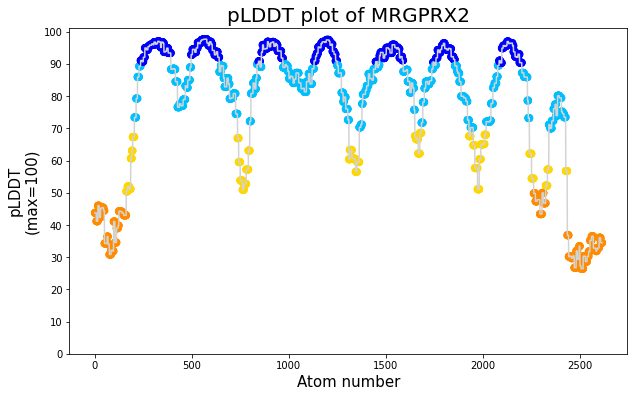

In [33]:
#Draw the plot
import matplotlib.pyplot as plt #Bring the matplotlib to draw the plot
import matplotlib as mpl
ids=str(protein) #Make the string of protein name
pn=ids[14:-1] #Extract the name

#plot
fig, ax = plt.subplots(figsize=(10, 6)) #Set the size of figure
cmaps = mpl.colors.ListedColormap(['darkorange','gold','deepskyblue','b']) #Set the colormap
bounds = [0,50,70,90,100] #Set the bound for colormap
norms = mpl.colors.BoundaryNorm(bounds,cmaps.N) #Set the norm for colormap
ax.plot(X,Y,color='lightgrey') #Set the color of line plot
ax.scatter(X,Y,s=50,c=Y,cmap=cmaps,norm=norms) #Draw the scatter plot and set the colormap
ax.set_title("pLDDT plot of "+pn, fontsize=20) #Set the title and fontsize
ax.set_xlabel("Atom number",fontsize=15) #Set the x label and fontsize
ax.set_ylabel("pLDDT\n(max=100)",fontsize=15) #Set the y label and fontsize, remeber the \n
plt.yticks(range(0, 109,10)) #Custom the y sticks
plt.show() #Show the plot

In [34]:
#Use the residue number to view the pLDDT value
X1=[] #Create the empty list
Y1=[] #Create the empty list
nr_1=range(0,len(residue)) #Select the residue range, remember the len(residue)
N1=nr_1[0] #Set the base value for for loop
for i in nr_1: #Repeat the for loop
    atoms1=list(residue[i].get_atoms()) #Extract the atom list of each residue
    bb=atoms1[0].get_bfactor() #All pLDDT value is same in on residue, just use the first atom
    Y1.append(bb) #Add pLDDT to y-value list
    N1=N1+1 #Create x-value which means residue number
    X1.append(N1) #Add residue numer to x-value list

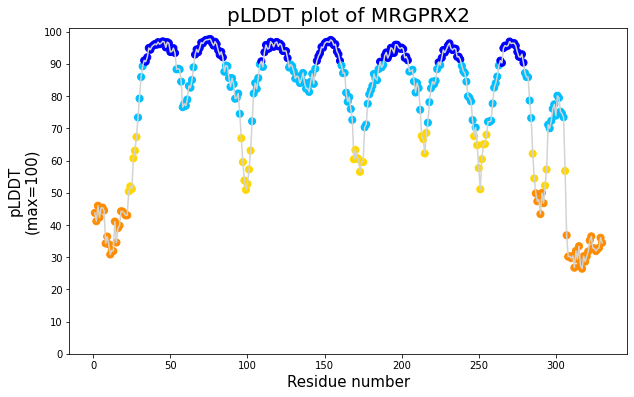

In [35]:
#Draw the plot
import matplotlib.pyplot as plt #Bring the matplotlib to draw the plot
import matplotlib as mpl
ids=str(protein) #Make the string of protein name
pn=ids[14:-1] #Extract the name

#plot
fig, ax = plt.subplots(figsize=(10, 6)) #Set the size of figure
cmaps = mpl.colors.ListedColormap(['darkorange','gold','deepskyblue','b']) #Set the colormap
bounds = [0,50,70,90,100] #Set the bound for colormap
norms = mpl.colors.BoundaryNorm(bounds,cmaps.N) #Set the norm for colormap
ax.plot(X1,Y1,color='lightgrey') #Set the color of line plot
ax.scatter(X1,Y1,s=50,c=Y1,cmap=cmaps,norm=norms) #Draw the scatter plot and set the colormap
ax.set_title("pLDDT plot of "+pn, fontsize=20) #Set the title and fontsize
ax.set_xlabel("Residue number",fontsize=15) #Set the x label and fontsize
ax.set_ylabel("pLDDT\n(max=100)",fontsize=15) #Set the y label and fontsize, remeber the \n
plt.yticks(range(0, 109,10)) #Custom the y sticks
plt.show() #Show the plot

In [36]:
##Extract the residue number, pLDDT<50
X2=[] #Create the empty list
Y2=[] #Create the empty list
nr_2=range(0,len(residue)) #Select the residue range, remember the len(residue)
cr_s2=0 ##Set the criteria of pLDDT
cr_e2=50 ##Set the criteria of pLDDT
for i in nr_2: #Repeat the for loop
    atoms1=list(residue[i].get_atoms()) #Extract the atom list of each residue
    bb=atoms1[0].get_bfactor() #All pLDDT value is same in on residue, just use the first atom
    if bb >= cr_s2 and bb < cr_e2:
        Y2.append(bb) #Add pLDDT to y-value list
        N2=i+1 #Create x-value which means residue number
        X2.append(N2) #Add residue numer to x-value list

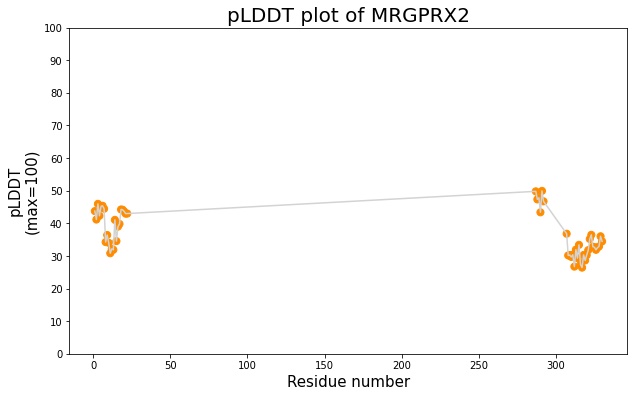

0<pLDDT<50
Total: 52
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 287, 288, 289, 290, 291, 292, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330]


In [37]:
#Draw the plot
import matplotlib.pyplot as plt #Bring the matplotlib to draw the plot
import matplotlib as mpl
ids=str(protein) #Make the string of protein name
pn=ids[14:-1] #Extract the name

#plot
fig, ax = plt.subplots(figsize=(10, 6)) #Set the size of figure
cmaps = mpl.colors.ListedColormap(['darkorange','gold','deepskyblue','b']) #Set the colormap
bounds = [0,50,70,90,100] #Set the bound for colormap
norms = mpl.colors.BoundaryNorm(bounds,cmaps.N) #Set the norm for colormap
ax.plot(X2,Y2,color='lightgrey') #Set the color of line plot
ax.scatter(X2,Y2,s=50,c=Y2,cmap=cmaps,norm=norms) #Draw the scatter plot and set the colormap
ax.set_title("pLDDT plot of "+pn, fontsize=20) #Set the title and fontsize
ax.set_xlabel("Residue number",fontsize=15) #Set the x label and fontsize
ax.set_ylabel("pLDDT\n(max=100)",fontsize=15) #Set the y label and fontsize, remeber the \n
plt.yticks(range(0, 109,10)) #Custom the y sticks
plt.show() #Show the plot

#View the residue number
print('0<pLDDT<50')
print('Total:',len(X2))
print(X2)

In [38]:
##Extract the residue number, 50<pLDDT<70
X3=[] #Create the empty list
Y3=[] #Create the empty list
nr_3=range(0,len(residue)) #Select the residue range, remember the len(residue)
cr_s3=50 ##Set the criteria of pLDDT
cr_e3=70 ##Set the criteria of pLDDT
for i in nr_3: #Repeat the for loop
    atoms1=list(residue[i].get_atoms()) #Extract the atom list of each residue
    bb=atoms1[0].get_bfactor() #All pLDDT value is same in on residue, just use the first atom
    if bb >= cr_s3 and bb < cr_e3:
        Y3.append(bb) #Add pLDDT to y-value list
        N2=i+1 #Create x-value which means residue number
        X3.append(N2) #Add residue numer to x-value list

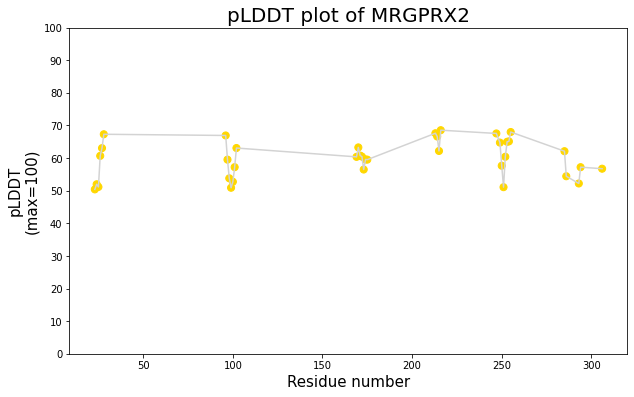

50<pLDDT<70
Total: 37
[23, 24, 25, 26, 27, 28, 96, 97, 98, 99, 100, 101, 102, 169, 170, 171, 172, 173, 174, 175, 213, 214, 215, 216, 247, 249, 250, 251, 252, 253, 254, 255, 285, 286, 293, 294, 306]


In [39]:
#Draw the plot
import matplotlib.pyplot as plt #Bring the matplotlib to draw the plot
import matplotlib as mpl
ids=str(protein) #Make the string of protein name
pn=ids[14:-1] #Extract the name

#plot
fig, ax = plt.subplots(figsize=(10, 6)) #Set the size of figure
cmaps = mpl.colors.ListedColormap(['darkorange','gold','deepskyblue','b']) #Set the colormap
bounds = [0,50,70,90,100] #Set the bound for colormap
norms = mpl.colors.BoundaryNorm(bounds,cmaps.N) #Set the norm for colormap
ax.plot(X3,Y3,color='lightgrey') #Set the color of line plot
ax.scatter(X3,Y3,s=50,c=Y3,cmap=cmaps,norm=norms) #Draw the scatter plot and set the colormap
ax.set_title("pLDDT plot of "+pn, fontsize=20) #Set the title and fontsize
ax.set_xlabel("Residue number",fontsize=15) #Set the x label and fontsize
ax.set_ylabel("pLDDT\n(max=100)",fontsize=15) #Set the y label and fontsize, remeber the \n
plt.yticks(range(0, 109,10)) #Custom the y sticks
plt.show() #Show the plot

#View the residue number
print('50<pLDDT<70')
print('Total:',len(X3))
print(X3)

In [40]:
##Extract the residue number, 70<pLDDT<90
X4=[] #Create the empty list
Y4=[] #Create the empty list
nr_4=range(0,len(residue)) #Select the residue range, remember the len(residue)
cr_s4=70 ##Set the criteria of pLDDT
cr_e4=90 ##Set the criteria of pLDDT
for i in nr_4: #Repeat the for loop
    atoms1=list(residue[i].get_atoms()) #Extract the atom list of each residue
    bb=atoms1[0].get_bfactor() #All pLDDT value is same in on residue, just use the first atom
    if bb >= cr_s4 and bb < cr_e4:
        Y4.append(bb) #Add pLDDT to y-value list
        N2=i+1 #Create x-value which means residue number
        X4.append(N2) #Add residue numer to x-value list

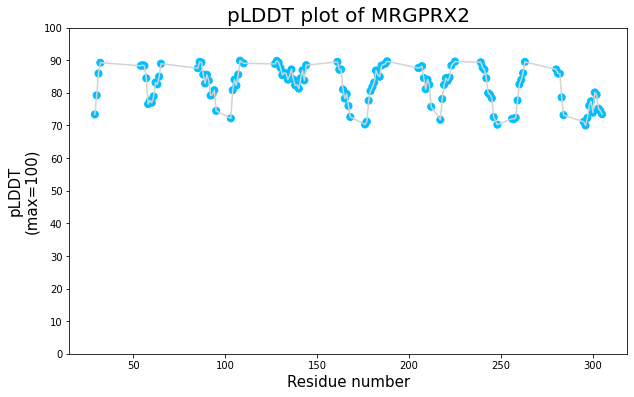

70<pLDDT<90
Total: 121
[29, 30, 31, 32, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 103, 104, 105, 106, 107, 108, 110, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 161, 162, 163, 164, 165, 166, 167, 168, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 205, 206, 207, 208, 209, 210, 211, 212, 217, 218, 219, 220, 221, 222, 223, 225, 239, 240, 241, 242, 243, 244, 245, 246, 248, 256, 257, 258, 259, 260, 261, 262, 263, 280, 281, 282, 283, 284, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305]


In [41]:
#Draw the plot
import matplotlib.pyplot as plt #Bring the matplotlib to draw the plot
import matplotlib as mpl
ids=str(protein) #Make the string of protein name
pn=ids[14:-1] #Extract the name

#plot
fig, ax = plt.subplots(figsize=(10, 6)) #Set the size of figure
cmaps = mpl.colors.ListedColormap(['darkorange','gold','deepskyblue','b']) #Set the colormap
bounds = [0,50,70,90,100] #Set the bound for colormap
norms = mpl.colors.BoundaryNorm(bounds,cmaps.N) #Set the norm for colormap
ax.plot(X4,Y4,color='lightgrey') #Set the color of line plot
ax.scatter(X4,Y4,s=50,c=Y4,cmap=cmaps,norm=norms) #Draw the scatter plot and set the colormap
ax.set_title("pLDDT plot of "+pn, fontsize=20) #Set the title and fontsize
ax.set_xlabel("Residue number",fontsize=15) #Set the x label and fontsize
ax.set_ylabel("pLDDT\n(max=100)",fontsize=15) #Set the y label and fontsize, remeber the \n
plt.yticks(range(0, 109,10)) #Custom the y sticks
plt.show() #Show the plot

#View the residue number
print('70<pLDDT<90')
print('Total:',len(X4))
print(X4)

In [42]:
##Extract the residue number, 90<pLDDT<100
X5=[] #Create the empty list
Y5=[] #Create the empty list
nr_5=range(0,len(residue)) #Select the residue range, remember the len(residue)
cr_s5=90 ##Set the criteria of pLDDT
cr_e5=100 ##Set the criteria of pLDDT
for i in nr_5: #Repeat the for loop
    atoms1=list(residue[i].get_atoms()) #Extract the atom list of each residue
    bb=atoms1[0].get_bfactor() #All pLDDT value is same in on residue, just use the first atom
    if bb >= cr_s5 and bb < cr_e5:
        Y5.append(bb) #Add pLDDT to y-value list
        N2=i+1 #Create x-value which means residue number
        X5.append(N2) #Add residue numer to x-value list

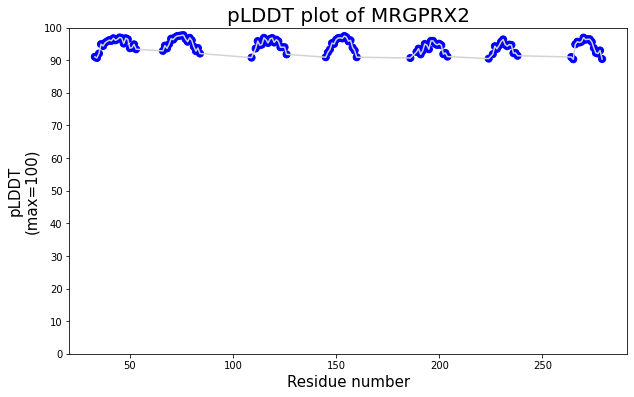

90<pLDDT<100
Total: 120
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 186, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279]


In [43]:
#Draw the plot
import matplotlib.pyplot as plt #Bring the matplotlib to draw the plot
import matplotlib as mpl
ids=str(protein) #Make the string of protein name
pn=ids[14:-1] #Extract the name

#plot
fig, ax = plt.subplots(figsize=(10, 6)) #Set the size of figure
cmaps = mpl.colors.ListedColormap(['darkorange','gold','deepskyblue','b']) #Set the colormap
bounds = [0,50,70,90,100] #Set the bound for colormap
norms = mpl.colors.BoundaryNorm(bounds,cmaps.N) #Set the norm for colormap
ax.plot(X5,Y5,color='lightgrey') #Set the color of line plot
ax.scatter(X5,Y5,s=50,c=Y5,cmap=cmaps,norm=norms) #Draw the scatter plot and set the colormap
ax.set_title("pLDDT plot of "+pn, fontsize=20) #Set the title and fontsize
ax.set_xlabel("Residue number",fontsize=15) #Set the x label and fontsize
ax.set_ylabel("pLDDT\n(max=100)",fontsize=15) #Set the y label and fontsize, remeber the \n
plt.yticks(range(0, 109,10)) #Custom the y sticks
plt.show() #Show the plot

#View the residue number
print('90<pLDDT<100')
print('Total:',len(X5))
print(X5)